In [22]:
# You have to install this libs only once by running this cell without #

#!pip install nltk
#!pip install gensim

Import one specific JSON

In [2]:
import json

with open('C:\\Users\\Admin\\Documents\\Teamprojekt- Ai knowlage base\\Project_git\\Extraction\\data\\https%3A%2F%2Fapi.elsevier.com%2Fcontent%2Farticle%2Fdoi%2F10.1016%2FS0933-3657%2801%2900089-6.json') as json_file:
    data = json.load(json_file)
    description = data["coredata"]["dc:description"]
    

Method to import all JSONs of a Directory. Option to load only the abstract

In [3]:
from pathlib import Path

def openJSONFiles(fileString, onlyAbstract=False):
    jsonReturn = []
    path = Path(fileString)
    for path in path.iterdir():
        if path.is_file():
            with open(path) as json_file:
                if onlyAbstract:
                    jsonReturn.append(json.load(json_file)["coredata"]["dc:description"])
                else:
                    jsonReturn.append(json.load(json_file))
    return jsonReturn

Exmaple

In [4]:
jsons = openJSONFiles('C:\\Users\\Admin\\Documents\\Teamprojekt- Ai knowlage base\\Project_git\\Extraction\\data', True)

In [112]:
jsons[9]

{'coredata': {'prism:url': 'https://api.elsevier.com/content/article/pii/S074906902030029X',
  'dc:identifier': 'doi:10.1016/j.cger.2020.04.009',
  'eid': '1-s2.0-S074906902030029X',
  'prism:doi': '10.1016/j.cger.2020.04.009',
  'pii': 'S0749-0690(20)30029-X',
  'dc:title': 'Artificial Intelligence and Digital Tools: Future of Diabetes Care ',
  'prism:publicationName': 'Clinics in Geriatric Medicine',
  'prism:aggregationType': 'Journal',
  'prism:issn': '07490690',
  'dc:format': 'application/json',
  'prism:coverDate': '2020-04-17',
  'prism:coverDisplayDate': 'Available online 17 April 2020',
  'prism:copyright': '© 2020 Published by Elsevier Inc.',
  'prism:publisher': 'Published by Elsevier Inc.',
  'dc:creator': [{'@_fa': 'true', '$': 'Sriram, Ram D.'},
   {'@_fa': 'true', '$': 'Reddy, S. Sethu K.'}],
  'dc:description': None,
  'openaccess': '0',
  'openaccessArticle': False,
  'openaccessType': None,
  'openArchiveArticle': False,
  'openaccessSponsorName': None,
  'openacces

In [44]:
# import nltk
# from nltk.tokenize import TweetTokenizer

# tokenizer = TweetTokenizer()
# Tok_Desc = tokenizer.tokenize(description)


# print(Tok_Desc)

Methods for tokenization, removment of stopwords and stemming

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
import re, string
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict
from collections.abc import Iterable
from nltk import ngrams


def tokenize(text, sentenceSeperate=False, includePunctation= False):
    data = [] 
    #intern functions
    def withPunctation(text):
        temp = [] 
         # tokenize the sentence into words 
        for j in word_tokenize(text): 
            temp.append(j)
        return temp
    def withoutPunctation(text):
        token_pattern = re.compile(r"(?u)\b\w\w+\b") # split on whitespace (and remove punctation)
        return token_pattern.findall(text)
    
    text = text.lower()
    if sentenceSeperate:
        # iterate through each sentence in the file 
        for sentence in sent_tokenize(text): 
            if includePunctation:
                data.append(withPunctation(sentence))
            else:
                data.append(withoutPunctation(sentence))
    else:
        if includePunctation:
            data = withPunctation(text)
        else:
            data = withoutPunctation(text)
    
    return data
     

def removeStopwords(wordArray):
    
    my_stopwords = set(stopwords.words('english'))
    withoutStopwords = []
    
    #test if its a list of words or a list of sentences with words
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            withoutStopwords.append(removeStopwords(sentence))
            
    else:        
        for item in wordArray:
            if item not in my_stopwords:
                withoutStopwords.append(item)
    return withoutStopwords

def applyStemming(wordArray):
    stemmer = PorterStemmer()
    stems = []
    
    #test if its a list of words or a list of sentences with words
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            stems.append(applyStemming(sentence))
    else:       
        for item in wordArray:
            stems.append(stemmer.stem(item))
    return stems


def applyLemmatizing(wordArray):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV   
    
    #intern function
    def lemmazizeText(text):
        temp = []
        for token, tag in pos_tag(text):
            temp.append(lemma_function.lemmatize(token, tag_map[tag[0]]))
        return temp

            
    lemma_function = WordNetLemmatizer()
    baseWords = []
    if isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        for sentence in wordArray:
            baseWords.append(lemmazizeText(sentence))
    else:
        baseWords =lemmazizeText(wordArray)
     
    return baseWords

def addNGram(wordArray, NGramLength=2):
    holetext= wordArray
    temp = []
    if len(wordArray)>0 and isinstance(wordArray[0], Iterable)and not isinstance(wordArray[0], str):
        print("drin")
        for sentence in wordArray:
            temp.append(' '.join(sentence))
        holetext = (' '.join(temp)).split()
    nGrams = list(ngrams(holetext, NGramLength))
    
    # make nGram from two words to one 
    nGramsFull = pd.Series(nGrams).apply(lambda row: ' '.join(row))
    wordArrayCopy = wordArray.copy()
    wordArrayCopy.extend(nGramsFull)
    return (wordArrayCopy)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
type(description)

str

Example

In [89]:
# firstTime = time.time()
# print("Original Text:\n",description)

# description_P1 = tokenize(description)
# print("\nAfter Tokenization:\n",description_P1)

# description_P2 = removeStopwords(description_P1)
# print("\nAfter Stopword removal:\n",description_P2)

# description_P3 = applyStemming(description_P2)
# print("\nAfter Stemming:\n",description_P3)

# description_P3_1 = applyLemmatizing(description_P2)
# print("\nAfter Lemmatization (with previous stopword removal\n",description_P3_1)

# description_P3_2 = removeStopwords(applyLemmatizing(description_P1))
# print("\nAfter Lemmatization (with subsequent stopword removal\n",description_P3_2)

# description_P4 = addNGram(description_P3_2)
# print("\nAfter adding NGrams\n",description_P4)
# print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [6]:
firstTime = time.time()
abstractsPro = []
abstractsUsed = []
i=0
for abstract in jsons:
    if abstract is not None:
        abstractsPro.append(applyLemmatizing(removeStopwords(tokenize(abstract))))
        abstractsUsed.append(abstract)
        i= i+1
print(i," out of ",len(jsons)," abstracts cound be found and are converted")
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

52  out of  76  abstracts cound be found and are converted


In [72]:
# # Python program to generate word vectors using Word2Vec 

# # importing all necessary modules 
# from nltk.tokenize import sent_tokenize, word_tokenize 
# import warnings 

# warnings.filterwarnings(action = 'ignore') 

# import gensim 
# from gensim.models import Word2Vec 


# data = tokenize(description, True,True)


# # Create CBOW model 
# model1 = gensim.models.Word2Vec(data, min_count = 1, 
#                             size = 100, window = 5) 

# # Print results 
# print("Cosine similarity between 'alice' " +
#             "and 'wonderland' - CBOW : ", 
#     model1.similarity('alice', 'wonderland')) 

# print("Cosine similarity between 'alice' " +
#                 "and 'machines' - CBOW : ", 
#     model1.similarity('alice', 'machines')) 

# # Create Skip Gram model 
# model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
#                                             window = 5, sg = 1) 

# # Print results 
# print("Cosine similarity between 'alice' " +
#         "and 'wonderland' - Skip Gram : ", 
#     model2.similarity('alice', 'wonderland')) 

# print("Cosine similarity between 'alice' " +
#             "and 'machines' - Skip Gram : ", 
#     model2.similarity('alice', 'machines')) 


# doc2vec

In [10]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

firstTime = time.time()
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(abstractsPro)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)


# Save file and load it again
fname = get_tmpfile("my_doc2vec_model")

model.save(fname)
model = Doc2Vec.load(fname)  # you can continue training with the loaded model!
#delete traingmode (save memmory)
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

unable to import 'smart_open.gcs', disabling that module


In [139]:
#vector = model.infer_vector(["system", "und jetzt"]) 
#model.docvecs.most_similar(5)

In [177]:
firstTime = time.time()
vectors = []
for x,y in documents:
    vectors.append(model.docvecs[y[0]]) 
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [183]:
from sklearn.manifold import TSNE
import pandas as pd

tsne = TSNE(n_components=2, random_state=30)

matrix_2D = tsne.fit_transform(vectors)
points = pd.DataFrame(matrix_2D,columns=["x","y"])
points["word"]= range(52)

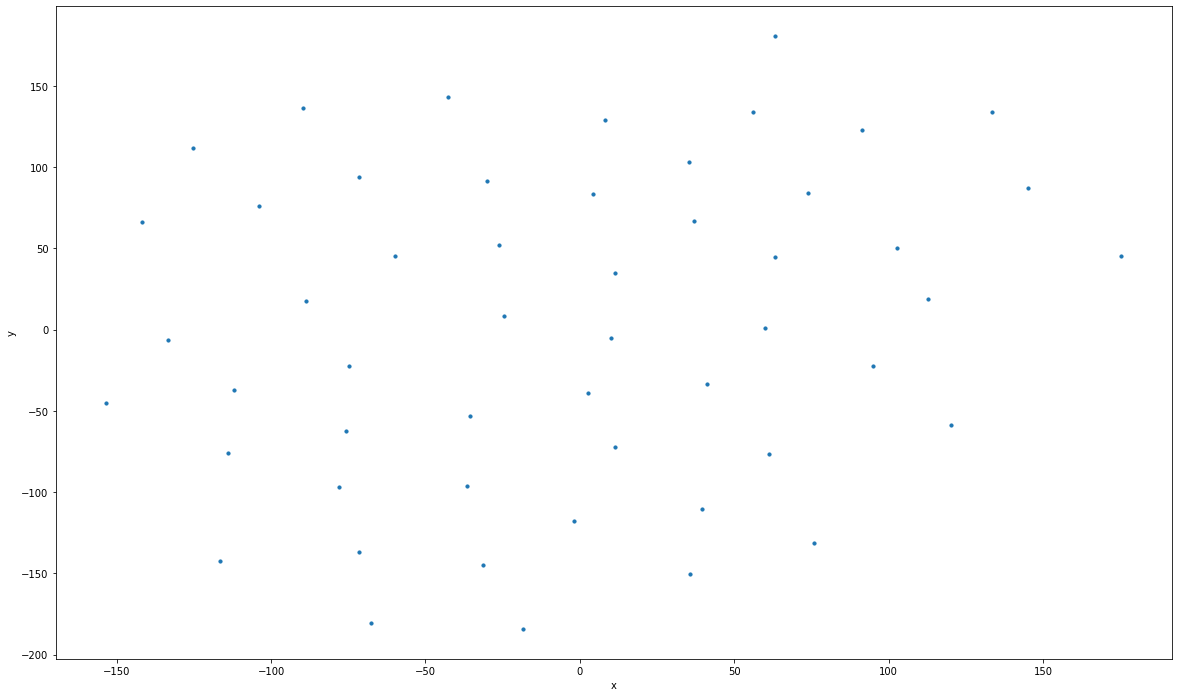

In [203]:
points.plot.scatter("x","y",s=10, figsize= (20,12))

# Bag of words

Function for calling bag of words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Term Frequency (TF) and TF-IDF 
#useInverse = True = TF-IDF else TF

def bagOfWords(docs, useInverse,preProcessFunc,min_df=0.1, max_df=0.3): #procentual or absolute is a valide input
    if not useInverse:
        vectorizer = TfidfVectorizer(use_idf=False, norm='l1',tokenizer = preProcessFunc,min_df=min_df, max_df=max_df)
    else:
        vectorizer = TfidfVectorizer(tokenizer = preProcessFunc,min_df=min_df, max_df=max_df)
    matrix = vectorizer.fit_transform(docs)
    return pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
def sumPreprocessBoW(text):
    return applyLemmatizing(removeStopwords(tokenize(text)))

firstTime = time.time()
vectorsBoW = bagOfWords(cutHotelData, True, sumPreprocessBoW)
print ("--- %s seconds ---" % round(time.time()-firstTime,4))

In [ ]:
vectorsBoW